<h1 style="text-align: center;">Task-3P: Working with numpy Matrices (Multidimensional Data)</h1>
<h3 style="text-align: right;">Name: Yatharth Deoly</h3>
<h3 style="text-align: right;">StudentId: 224207854</h3>
<h3 style="text-align: right;">EmailId: yatharthdeoly@gmail.com</h3>


## Introduction
In this case study we will be learning the usage of numpy with help of the National Health and Nutrition Examination Survey(NHANES) dataset. NHANES dataset comprises different body measurements of both males and females.
Dataset comprises feature i.e.:
- `BMXWT` -> weight(kg)
- `BMXHT` -> standing height(cm)
- `BMXARML` -> upper arm length(cm)
- `BMXLEG` -> upper leg length(cm)
- `BMXARMC` -> arm circumference(cm)
- `BMXHIP` -> hip circumference(cm)
- `BMXWAIST` -> waist circumference(cm)

Defining imports at the top that will be used by the report.
In this case, having all the imports at the top is more intuitive than having some of them at the top and some of them scattered over the file.

In [1]:
import warnings
import numpy as np

# Format a fixed width table for pretty printing.
from tabulate import tabulate

# Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
import matplotlib.pyplot as plt

# Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.
import seaborn as sns

from scipy.stats import skew, spearmanr

# Ignore all warnings generated by the Python program
warnings.filterwarnings("ignore")

# This command tells the IPython environment to draw the plots immediately after the current cell
%matplotlib inline

Extracting data into numpy matrix for female dataset.

In [2]:
female_matrix = np.genfromtxt("nhanes_adult_female_bmx_2020.csv", skip_header=19, dtype=float, delimiter=',')
print(f'Female dataset have {female_matrix.shape[0]} entries for {female_matrix.shape[1]} features.')

Female dataset have 4221 entries for 7 features.


Extracting data into numpy matrix for male dataset.

In [3]:
male_matrix = np.genfromtxt("nhanes_adult_male_bmx_2020.csv", skip_header=19, dtype=float, delimiter=',')
print(f'Male dataset have {male_matrix.shape[0]} entries for {male_matrix.shape[1]} features.')

Male dataset have 4081 entries for 7 features.


As we will be calculating BMIs for different inputs, we have made a generic function which will return BMI as per the input selection and provided details.
So, BMI formula is derived as:
$$ \boldsymbol{BMI}  =  (\frac{mass_{kg}}{height_m^2})  =  (\frac{mass_{lb}}{height_{in}^2}) \times 703 $$

In [4]:
def calc_bmi(matrix):
    """
        This method is used to calculate BMI as per the user inputs.
        input: numpy matrix

        output: Array of BMI value will be returned, round to 2 decimal values
    """
    height_meter = matrix[:, 1] / 100
    weight_kg = matrix[:, 0]
    return np.round(weight_kg / (height_meter ** 2), 2)

Calculating BMI for females and appending to the matrix resultant.

In [5]:
# Stacking the given arrays
female_matrix_final = np.column_stack((female_matrix, calc_bmi(female_matrix)))

Calculating BMI for males and appending to the matrix resultant.

In [6]:
# Stacking the given arrays
male_matrix_final = np.column_stack((male_matrix, calc_bmi(male_matrix)))

As we have calculated BMIs, now we will be plotting a graph using histogram plot, which is a type of bar plot that shows the distribution of a numeric variable's values that are grouped into bins.
Here we will be creating histogram plots for both males and females for BMIs clubbed in a single plot.

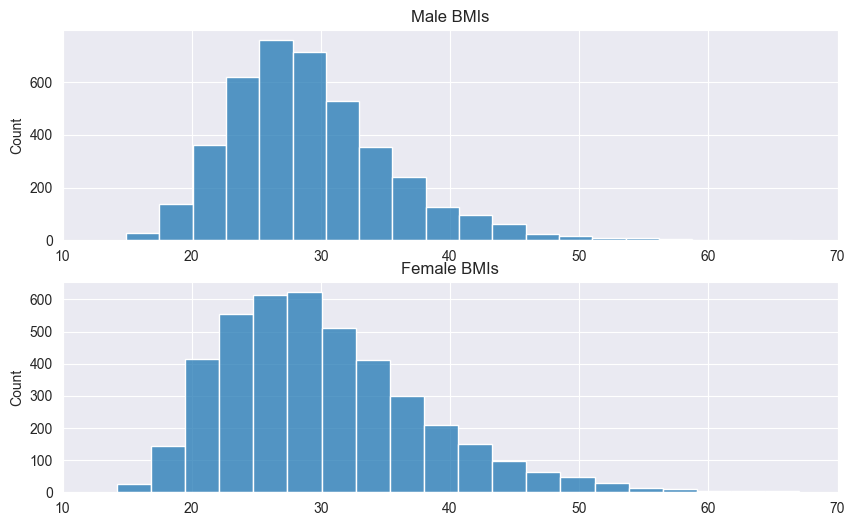

In [7]:
# Create a figure and a set of subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 6))

# Plot the male histogram with 20 bins
sns.histplot(male_matrix_final[:, -1], ax=ax[0], bins=20)

# Plot the female histogram with 20 bins
sns.histplot(female_matrix_final[:, -1], ax=ax[1], bins=20)

# Adding title to plots
ax[0].set_title('Male BMIs')
ax[1].set_title('Female BMIs')

# Set the x-axis limits
[x.set_xlim([10, 70]) for x in ax]

# Show the plot
plt.show()

As per the hist plot visualization, we can interpret that:
- Male Dataset:
    - There are a large number of persons who lie in a bin of 25-29.99 BMI category.
    - There are people who lie at the higher end of BMI and lower end also.
- Female Dataset:
    - There are a large number of persons who lie in a bin of 25-29.99 BMI category.
    - There are people who lie at the higher end of BMI and lower end also.
- Healthcare can run an analysis over different BMI values, via which they can make a diet chart, exercise chart, nutrients chart and more and can target the specific audience on the basis of the weight group they lie in.

Now will be checking for outliers using box plots.
An outlier is a data point that is numerically distant from the rest of the data. In a box plot, an outlier is a data point that is located outside the whiskers.
A box plot is a special type of diagram that shows the quartiles in a box and the line extending from the lowest to the highest value.

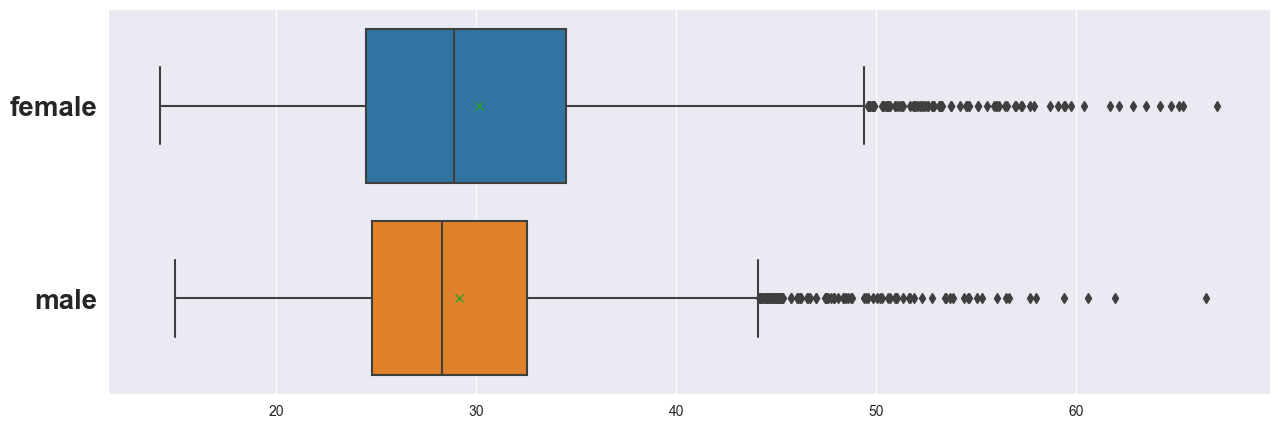

In [8]:
# set the figure size
plt.figure(figsize=(15, 5))

# forming dataset for bmis of female or male.
combined_dataset = [female_matrix_final[:,-1],male_matrix_final[:,-1]]

# Creating box plot
ax = sns.boxplot(combined_dataset,orient='h', showmeans=True, meanprops={"marker": "x", "color": "green"})

# Set the y-axis labels
labels = ["female" if y.get_text() == '0' else "male" for y in ax.get_yticklabels()]
ax.set_yticklabels(labels, weight='bold', fontsize=20)

# Display plot
plt.show()

As per the visualization, we can derive:
- There are outliers in the right side of the whisker, for both female and male BMIs.
- Mean is greater than median.

Using BMI extracted data, now we will be calculating different aggregation data. These data we can use for our further analysis.

In [9]:
def calculate_aggregates(vector):
    """
    This method will be calculating different aggregation data for provided vector.

    :param vector: array_like, Array containing numbers.
    """

    def round_value_2_decimal(val):
        """
        Round the given value to the 2 decimals places.

        :param val: numerical value provided, like 5.51678

        :return: 2 decimal rounded value, like 5.52
        """
        return np.round(val, 2)

    data_dict = {}

    # Computing the 25-th quantile of the data.
    q1 = np.quantile(vector, 0.25)

    # Computing the 75-th quantile of the data.
    q3 = np.quantile(vector, 0.75)

    # Computing the arithmetic mean
    data_dict.__setitem__('am', round_value_2_decimal(np.mean(vector)))

    # Computing the minimum of an array
    data_dict.__setitem__('min', round_value_2_decimal(np.min(vector)))

    # Representing the first quartile
    data_dict.__setitem__('q1', round_value_2_decimal(q1))

    # Computing the median of the array elements
    data_dict.__setitem__('med', round_value_2_decimal(np.median(vector)))

    # Representing the third quartile
    data_dict.__setitem__('q3', round_value_2_decimal(q3))

    # Computing the maximum of an array
    data_dict.__setitem__('max', round_value_2_decimal(np.max(vector)))

    # Computing the standard deviation of an array
    data_dict.__setitem__('sd', round_value_2_decimal(np.std(vector)))

    # Computing interquartile range
    data_dict.__setitem__('iqr', round_value_2_decimal(q3 - q1))

    # Computing skewness
    data_dict.__setitem__('skew', round_value_2_decimal(skew(vector)))

    return data_dict

In [10]:
# Calculating aggregates for both male and female dataset
female_dict = calculate_aggregates(female_matrix_final[:, -1])
male_dict = calculate_aggregates(male_matrix_final[:, -1])

Creating a nice table for visualization purposes using tabulate.

In [11]:
am = ["Arithmetic Mean", female_dict.get('am'), male_dict.get('am')]
min = ["Minimum", female_dict.get('min'), male_dict.get('min')]
q1 = ["First quartile(Q1)", female_dict.get('q1'), male_dict.get('q1')]
med = ["Median", female_dict.get('med'), male_dict.get('med')]
q3 = ["Third quartile(Q3)", female_dict.get('q3'), male_dict.get('q3')]
max = ["Maximum", female_dict.get('max'), male_dict.get('max')]
sd = ["Standard Deviation", female_dict.get('sd'), male_dict.get('sd')]
iqr = ["Inter Quartile Range(IQR)", female_dict.get('iqr'), male_dict.get('iqr')]
skew = ["Skewness", female_dict.get('skew'), male_dict.get('skew')]

print(tabulate([am, min, q1, med, q3, max, sd, iqr, skew], headers=['BMI Aggregates', 'Female', 'Male']))

BMI Aggregates               Female    Male
-------------------------  --------  ------
Arithmetic Mean               30.1    29.14
Minimum                       14.2    14.91
First quartile(Q1)            24.46   24.79
Median                        28.89   28.27
Third quartile(Q3)            34.47   32.52
Maximum                       67.04   66.5
Standard Deviation             7.76    6.31
Inter Quartile Range(IQR)     10.01    7.73
Skewness                       0.92    0.97


Different analysis that has been reported from above observations:
- It can be concluded from histogram, boxplot and skewness value, that data is skewed to the right.
- Skewness can be concluded from mean and median also, as median is less than mean, then it also interprets that its right side is skewed.

As of now we will be focusing over male dataset and with the help visualisation will be checking different plots for the same.
Columns we will be using for our work:
- height
- weight
- waist
- hip
- BMI

In [12]:
# Creating a numpy matrix of specific columns and rearranging them in an order
male_5_col_matrix = male_matrix_final[:, [0, 1, 5, 6, 7]][:, [1, 0, 3, 2, 4]]

Using the above 5 column dataset, we will be plotting a graph using scatterplot matrix, which is a grid of scatter plots that visualizes the relationships between combinations of variables.

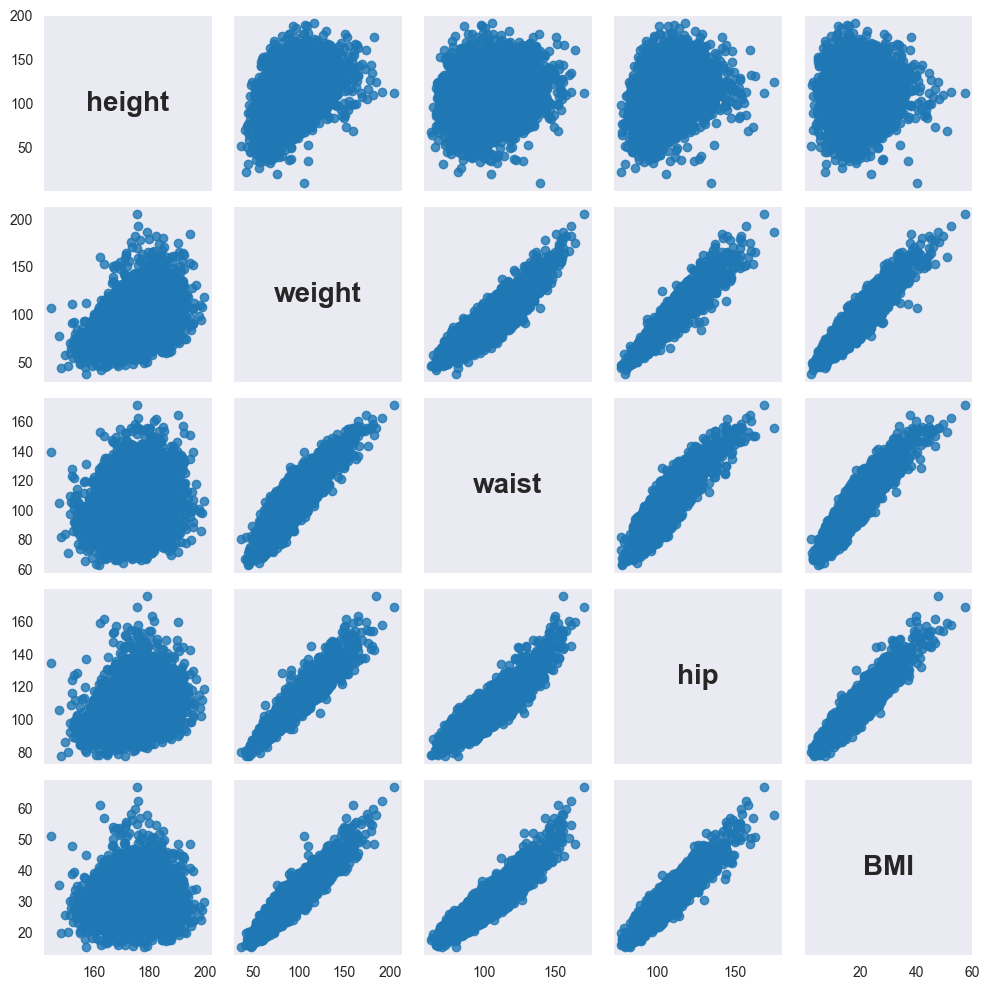

In [13]:
# Get the number of features
num_features = male_5_col_matrix.shape[1]

# Label the axes
feature_names = ['height', 'weight', 'waist', 'hip', 'BMI']

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=num_features, ncols=num_features, figsize=(10, 10))

# Looping for features to plot different relationship between different variables.
for i in range(num_features):
    for j in range(num_features):
        if i == j:
            x = y = 0.5
            if i == 0:
                axes[i, j].set_yticks([50, 100, 150, 200])
                y = 100
            elif i == num_features - 1:
                axes[i, j].set_xticks([20, 40, 60])
                x = 30

            # If on diagonal, plot text plot
            axes[i, j].text(x, y, feature_names[i], ha='center', va='center', weight='bold', fontsize=20)
        else:
            # If off the diagonal, plot a scatter plot
            axes[i, j].scatter(male_5_col_matrix[:, j], male_5_col_matrix[:, i], alpha=0.8)
        if j != 0:
            axes[i, j].set_yticks([])
        if i != num_features - 1:
            axes[i, j].set_xticks([])

        axes[i, j].grid(False)

# adjust the subplot parameters so that the subplot fits in to the figure area
plt.tight_layout()

# Show the plot
plt.show()

As per the visualization, we can derive:
- `BMI` is linear positively with `weight`, `waist` and `hip`.
- `hip` is linear positively with `waist` and `weight`.
- `waist` is linear positively with `weight`.

Using the above 5 column dataset, we will be plotting a graph using heatmap plot, which is a visual representation of data that uses color coding to show different values of correlation between variables.

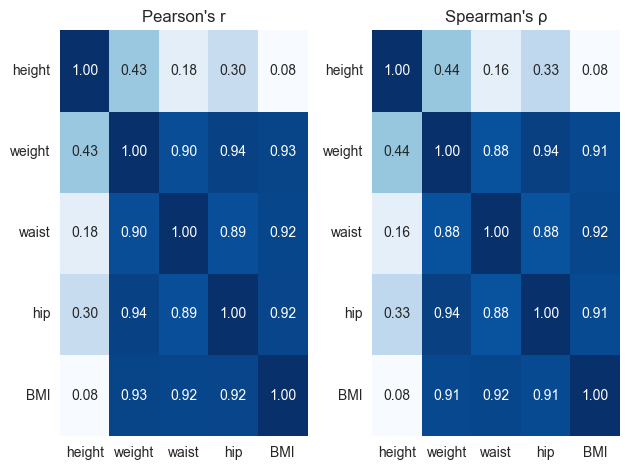

In [14]:
# Create 1st plot in a single figure
plt.subplot(1, 2, 1)

# Calculates pearson product-moment correlation coefficients
corr = np.corrcoef(male_5_col_matrix, rowvar=False)

# Creates pearson heat map plot
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f", xticklabels=feature_names, yticklabels=feature_names,
            cbar=False).set(title="Pearson's r"), plt.yticks(rotation=0)

# Create 2nd plot in a single figure
plt.subplot(1, 2, 2)

# Calculates Spearman correlation coefficient
corr, _ = spearmanr(male_5_col_matrix)

# Creates spearman heat map plot
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f", xticklabels=feature_names, yticklabels=feature_names,
            cbar=False).set(title="Spearman's ρ"), plt.yticks(rotation=0)

# adjust the subplot parameters so that the subplot fits in to the figure area
plt.tight_layout()

# Show the plot
plt.show()

As per the visualization, we can derive:
- `BMI` is positively correlated with `weight`, `waist` and `hip`.
- `hip` is positively correlated with `waist` and `weight`.
- `waist` is positively correlated with `weight`.
- `height` doesn't have correlation with other features.

## Summary
In this report we have worked with the National Health and Nutrition Examination Survey (NHANES) dataset, where we have calculated BMI with the given data. Different aggregation data, graphical visualization over different variables, checking their relation with other variables.
As currently we have calculated BMI, we can add more features, like BMI category, calculating BMI with respect to other BMI tools.
Medical companies can use different population models for their analysis and help in awareness in society.